In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import scipy.stats as stats

In [36]:
# df = pd.DataFrame(data, index=date_range)
# df.to_csv('data.csv', index=False)

df = pd.read_csv("/home/kevinpnjt/skripsi/code_arima/ARIMA_PROJEK/data.csv",index_col =False)

In [37]:
df

,Tanggal,IHK,Makanan dan minuman tidak beralkohol,Minuman beralkohol dan tembakau,Pakaian dan alas kaki,"Perumahan, air, listrik, gas, dan bahan bakar lainnya","Furnitur, perlengkapan rumah tangga, dan perbaikan rutin rumah",Kesehatan,Transportasi,Komunikasi,Rekreasi dan kebudayaan,Pendidikan,Penyediaan makan minum dan akomodasi,Barang dan jasa lainnya
0,2012/01,98.39,100.61,96.51,99.62,96.07,99.31,98.79,96.11,100.00,101.05,99.44,99.33,100.65
1,2012/02,97.12,96.67,96.78,100.48,96.96,99.42,98.79,96.52,100.00,102.43,99.44,99.58,101.20
2,2012/03,97.62,96.84,97.40,101.30,98.85,100.45,98.85,96.56,100.00,102.48,99.44,99.58,101.23
3,2012/04,97.67,96.84,97.63,101.32,99.01,100.39,98.85,96.73,100.00,102.87,99.69,99.61,101.23
4,2012/05,98.36,98.23,98.59,100.91,99.25,100.87,98.85,97.14,100.00,102.53,99.69,99.74,101.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,2024/05,157.85,168.55,238.47,123.35,153.16,144.34,133.43,183.15,106.77,147.58,138.68,150.13,174.14
149,2024/06,157.64,167.46,238.51,123.34,153.10,144.33,133.31,183.25,106.77,147.64,138.68,150.57,172.86
150,2024/07,156.35,161.73,240.98,123.62,153.28,144.41,133.49,183.47,106.72,147.72,139.00,150.59,166.95
151,2024/08,156.33,160.86,242.00,123.61,153.57,144.47,133.61,183.85,106.23,148.23,139.67,151.06,166.00


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


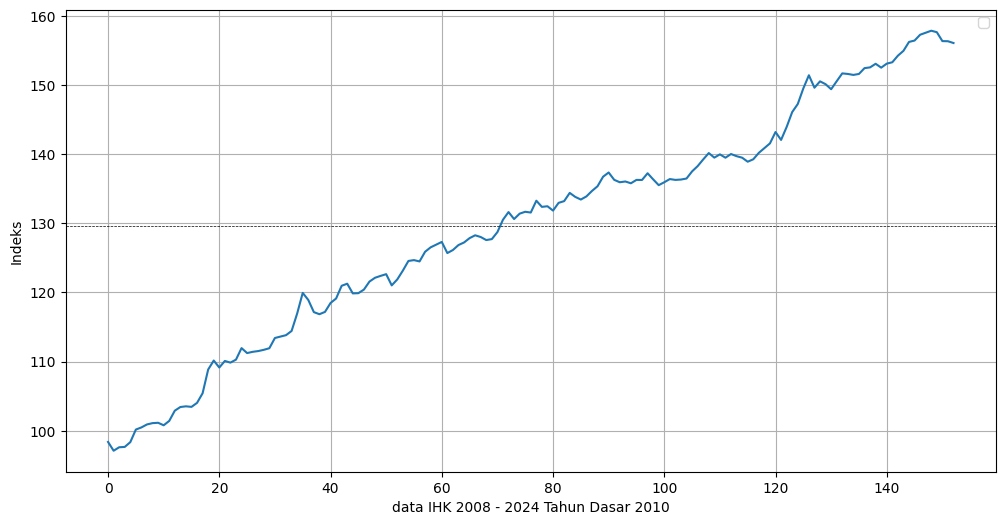

In [38]:
# df['Rolling_Mean'] = df['IHK'].rolling(window=3).mean() ##
# plt.plot(df['Rolling_Mean'])
plt.figure(figsize=(12, 6))
plt.plot(df.index,df['IHK'])
plt.axhline(df['IHK'].mean(), color='black', linewidth=0.5, linestyle='--')
plt.xlabel("data IHK 2008 - 2024 Tahun Dasar 2010")
plt.savefig('plot_IHK.png', dpi=300, bbox_inches='tight')
plt.ylabel("Indeks")
plt.legend()
plt.grid()
plt.show()

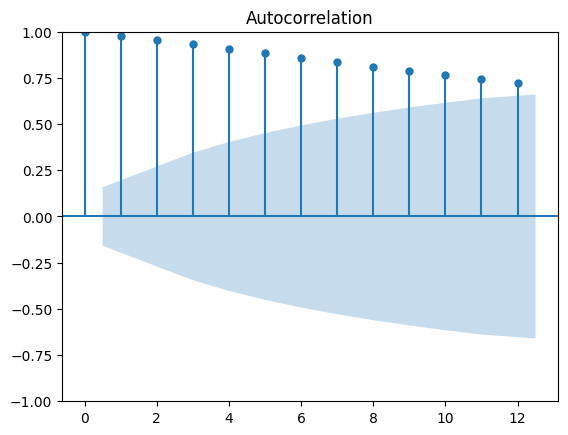

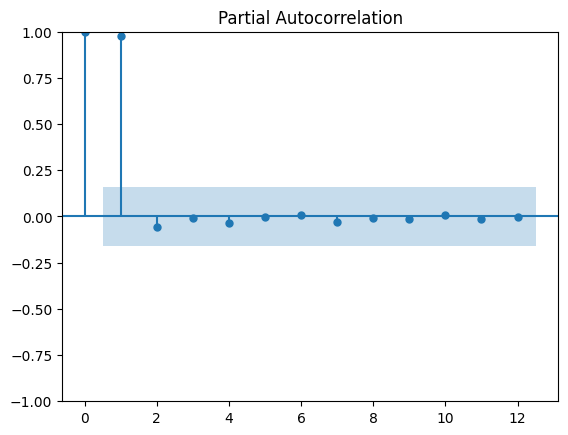

In [39]:
# Menggambarkan ACF dan PACF untuk menentukan parameter
plot_acf(df['IHK'], lags=12)
plt.savefig('plot_acfdata.png', dpi=300, bbox_inches='tight')
plot_pacf(df['IHK'], lags=12)
plt.savefig('plot_pacf-data.png', dpi=300, bbox_inches='tight')
plt.show()

In [40]:
data = df['IHK']

# Lakukan uji ADF
result = adfuller(data, maxlag=12)
# Tampilkan hasil
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -1.57280140895491
p-value: 0.49724023289549146
Critical Values:
   1%: -3.4753253063120644
   5%: -2.881274703275226
   10%: -2.5772928360116873


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


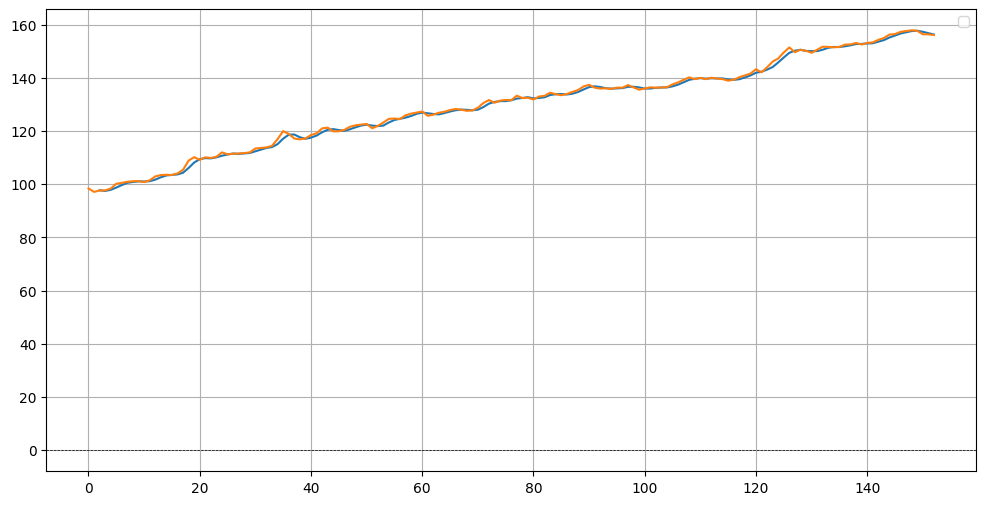

In [41]:
df['Rolling_Mean'] = df['IHK'].rolling(window=3).mean() ##
plt.figure(figsize=(12, 6))
plt.plot(df['Rolling_Mean'])
plt.plot(df.index,df['IHK'])
plt.savefig('plot_IHK.png', dpi=300, bbox_inches='tight')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


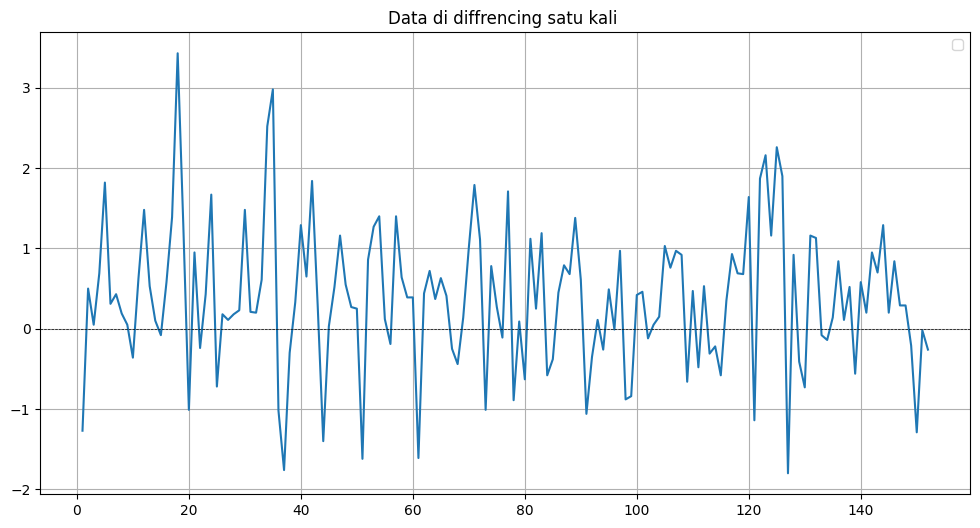

In [42]:
# Menghitung rolling mean dengan jendela 7
plt.figure(figsize=(12, 6))
plt.plot(df.index,df['IHK'].diff())
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.title("Data di diffrencing satu kali ")
plt.savefig('plot_IHK_diff1.png', dpi=300, bbox_inches='tight')
plt.legend()
plt.grid()
plt.show()

<Figure size 2400x1200 with 0 Axes>

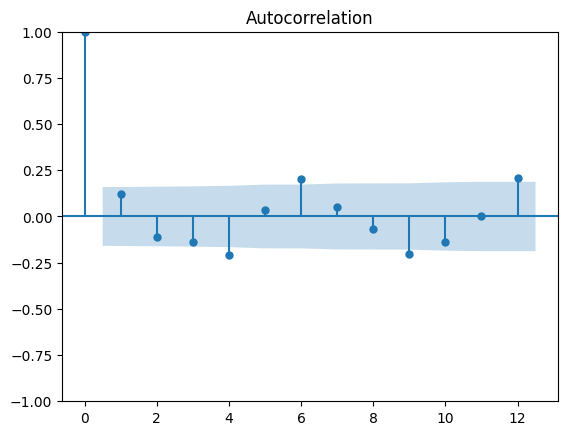

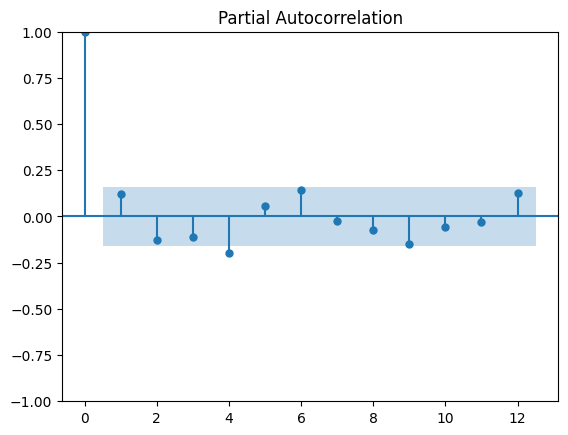

In [43]:
# Menggambarkan ACF dan PACF untuk menentukan parameter
plt.figure(figsize=(24, 12))
plot_acf(df['IHK'].diff().dropna(), lags=12)
plt.savefig('plot_IHK.acf_diff1.png', dpi=300, bbox_inches='tight')
plot_pacf(df['IHK'].diff().dropna(), lags=12)
plt.savefig('plot_IHK.pacf_diff1.png', dpi=300, bbox_inches='tight')
plt.show()

In [44]:
data = df['IHK'].diff().dropna()

# Lakukan uji ADF
result = adfuller(data, maxlag=12)
# Tampilkan hasil
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -8.174768548372818
p-value: 8.434868858723797e-13
Critical Values:
   1%: -3.4753253063120644
   5%: -2.881274703275226
   10%: -2.5772928360116873


In [45]:
data.diff()

1       NaN
2      1.77
3     -0.45
4      0.64
5      1.13
       ... 
148    0.00
149   -0.50
150   -1.08
151    1.27
152   -0.24
Name: IHK, Length: 152, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


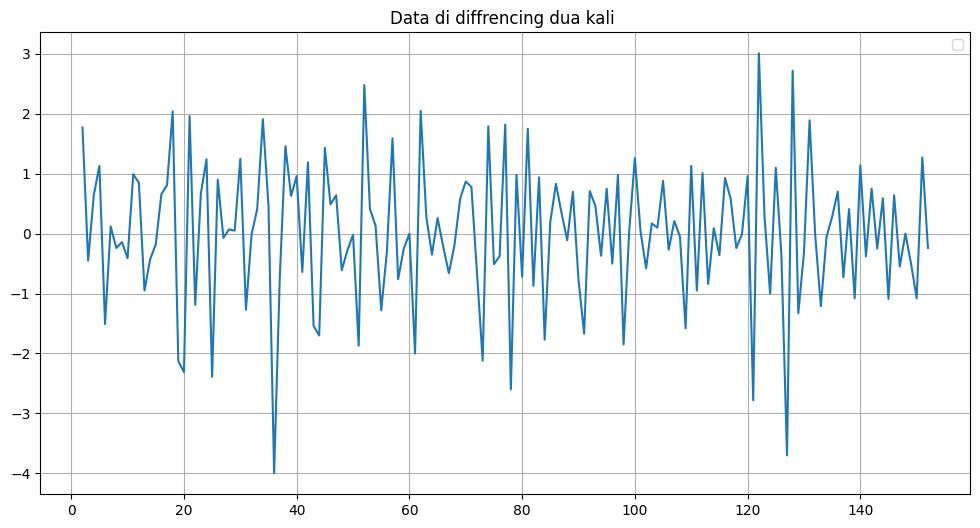

In [46]:
# Menghitung rolling mean dengan jendela 7
plt.figure(figsize=(12, 6))
plt.plot(data.diff().dropna())

plt.title("Data di diffrencing dua kali ")
plt.savefig('plot_IHK_diff2.png', dpi=300, bbox_inches='tight')
plt.legend()
plt.grid()
plt.show()

In [47]:
# Lakukan uji ADF
s = data.diff().dropna()
result = adfuller(s, maxlag=12)
# Tampilkan hasil
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -6.5952324218535905
p-value: 6.952327482076487e-09
Critical Values:
   1%: -3.4779446621720114
   5%: -2.8824156122448983
   10%: -2.577901887755102


<Figure size 1200x600 with 0 Axes>

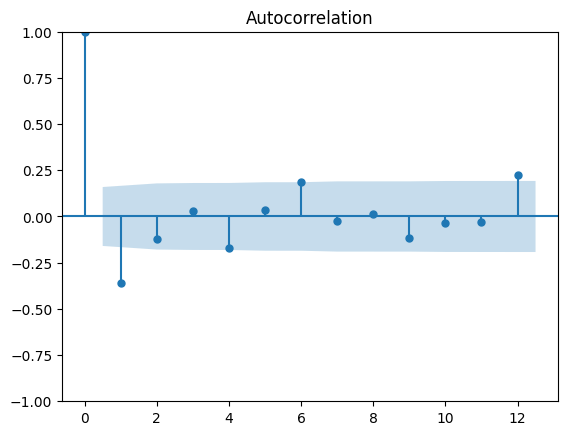

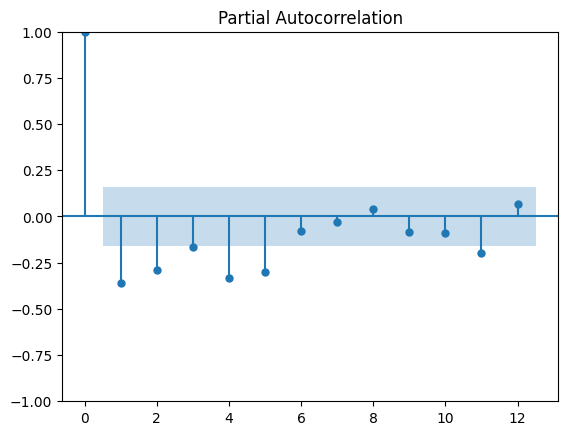

In [48]:
# Menggambarkan ACF dan PACF untuk menentukan parameter
plt.figure(figsize=(12, 6))
a = df['IHK'].diff()
b = a.diff()
plot_acf(b.dropna(), lags=12)
plt.savefig('plot_IHK.acf_diff2.png', dpi=300, bbox_inches='tight')
plot_pacf(b.dropna(), lags=12)
plt.savefig('plot_IHK.pacf_diff2.png', dpi=300, bbox_inches='tight')
plt.show()

## masalah di plotingan yang tidak konsisten

                               SARIMAX Results                                
Dep. Variable:                    IHK   No. Observations:                  122
Model:                 ARIMA(4, 1, 4)   Log Likelihood                -146.891
Date:                Sat, 08 Feb 2025   AIC                            311.781
Time:                        15:27:51   BIC                            336.943
Sample:                             0   HQIC                           322.001
                                - 122                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9721      4.199      0.232      0.817      -7.257       9.202
ar.L2         -0.0003      8.285  -3.65e-05      1.000     -16.240      16.239
ar.L3         -0.9846      8.287     -0.119      0.9

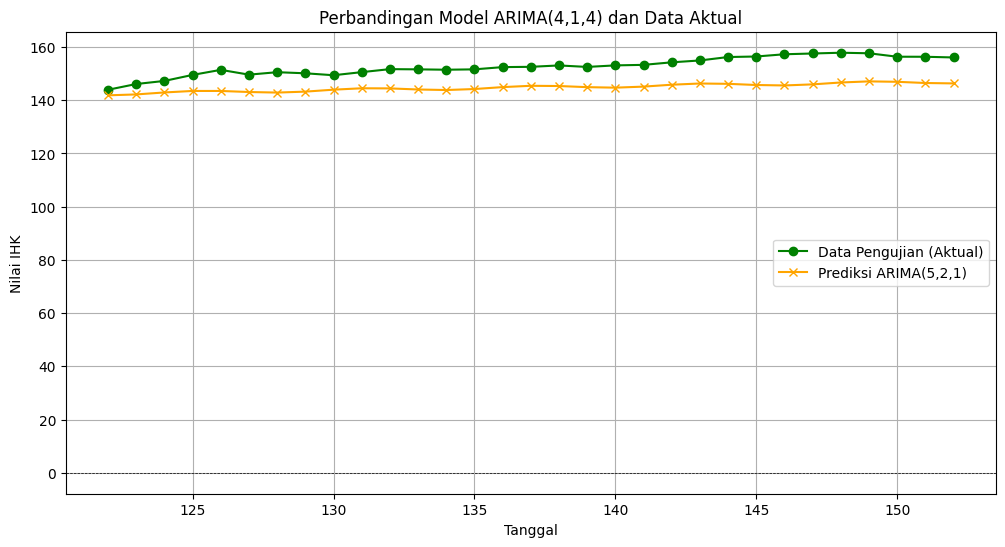

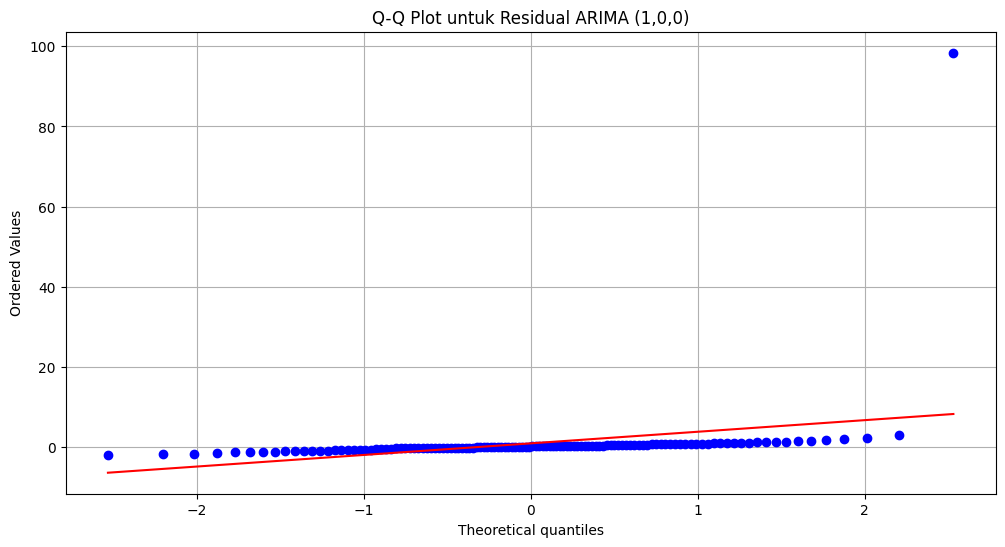

In [58]:
# Memisahkan data menjadi 80% pelatihan dan 20% pengujian
train_size = int(len(df)*0.8 )
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Fit model pada data pelatihan
model = ARIMA(train['IHK'], order=(4, 1, 4))
model_fit = model.fit()
residuals = model_fit.resid
# Melakukan prediksi untuk periode pengujian
n_forecast = len(test)
forecast = model_fit.get_forecast(steps=n_forecast)
forecast_values = forecast.predicted_mean

# # Menampilkan hasil prediksi
# print("Prediksi IHK:")
# print(forecast_values)
print(model_fit.summary())
#Plot hasil
plt.figure(figsize=(12, 6))

# plt.plot(train.index, train['IHK'], label='Data Pelatihan', color='blue')
plt.plot(test.index, test['IHK'], label='Data Pengujian (Aktual)', color='green', marker='o')
plt.plot(test.index,forecast_values, label='Prediksi ARIMA(5,2,1)', color='orange', marker='x')
plt.title('Perbandingan Model ARIMA(4,1,4) dan Data Aktual')
plt.xlabel('Tanggal')
plt.ylabel('Nilai IHK')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.savefig('plot_model_arima', dpi=300, bbox_inches='tight')
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot untuk Residual ARIMA (1,0,0)')
plt.savefig('plot-qq-plot residual.png', dpi=300, bbox_inches='tight')
plt.grid()
plt.show()

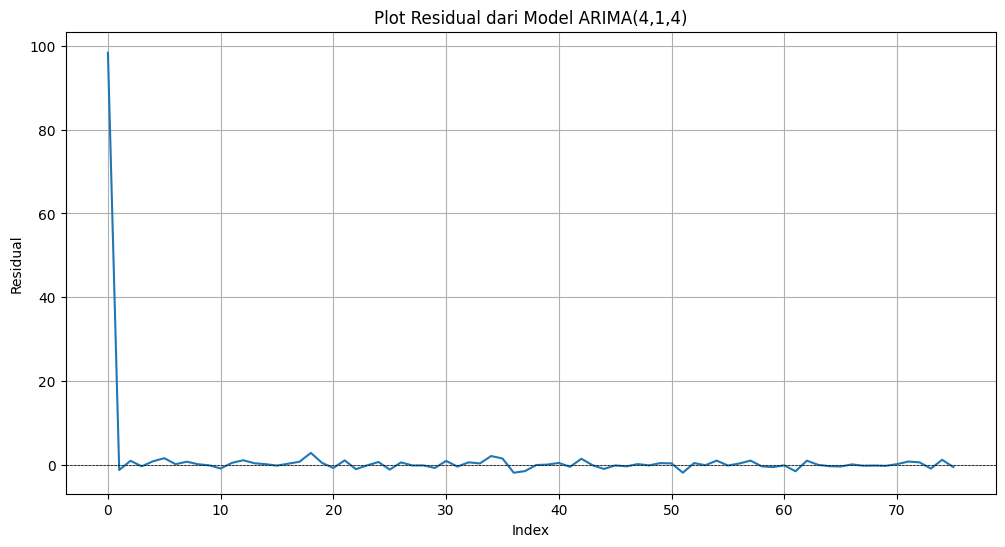

In [50]:
# --- Plot Residual ---
# Menghitung residual dari model


# Plot residual
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Plot Residual dari Model ARIMA(4,1,4)')
plt.xlabel('Index')
plt.ylabel('Residual')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.grid()
plt.show()
# 1. Q-Q Plot untuk memeriksa kesesuaian dengan distribusi normal



<Figure size 1200x600 with 0 Axes>

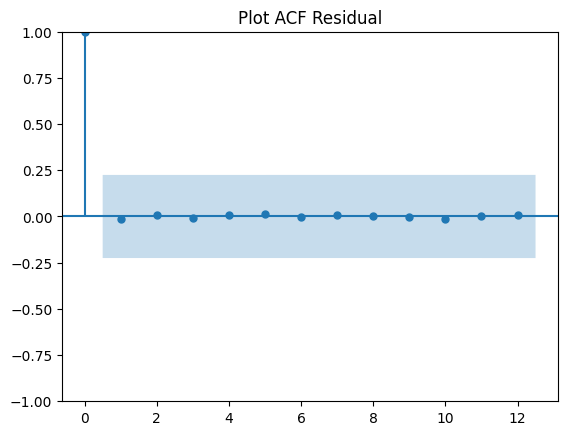

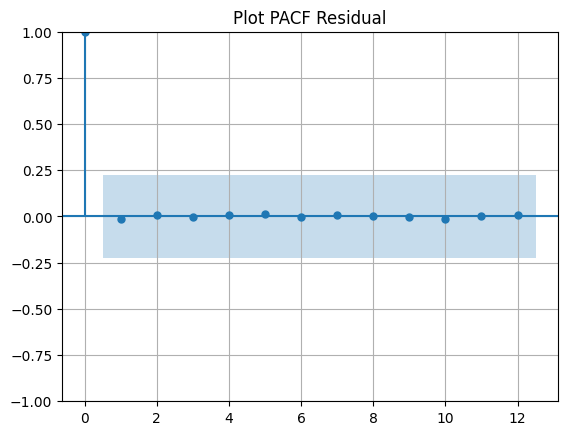

In [51]:
# Membuat plot Autokorelasi dari residuals
plt.figure(figsize=(12, 6))
plot_acf(residuals, lags=12)  
plt.title('Plot ACF Residual')
plt.savefig('plot_acf-residual.png', dpi=300, bbox_inches='tight')
plot_pacf(residuals, lags=12)  
plt.title('Plot PACF Residual')
plt.savefig('plot_pacf-residual.png', dpi=300, bbox_inches='tight')
plt.grid(True)

In [52]:
from sklearn.metrics import mean_absolute_percentage_error
#Menghitung error (MAE) pada data pengujian
mape = mean_absolute_percentage_error(test['IHK'], forecast_values)
print(f'Mean Absolute Error (Mape) pada data pengujian: {mape}')

Mean Absolute Error (Mape) pada data pengujian: 0.03671843308453845


In [53]:
# Prediksi untuk 12 bulan ke depan
forecast_steps = 100  # prediksi 12 bulan ke depan
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Menampilkan hasil prediksi untuk 12 bulan ke depan
print("Prediksi IHK untuk 12 bulan ke depan:")
print(forecast_values)

Prediksi IHK untuk 12 bulan ke depan:
76     132.339122
77     133.505316
78     133.777773
79     133.683706
80     133.530424
          ...    
171    172.673857
172    173.556435
173    173.839581
174    173.665734
175    173.644137
Name: predicted_mean, Length: 100, dtype: float64


In [54]:
# Import the library 
from pmdarima.arima import auto_arima

# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore") 

# Fit auto_arima function
stepwise_fit = auto_arima(df['IHK'], start_p = 1, start_q = 1, max_p = 3, max_q = 3, m = 12, start_P = 0, seasonal =False, d = 1, D = None, trace = True, 
error_action ='ignore', # we don't want to know if an order does not work 
suppress_warnings = True, # we don't want convergence warnings 
stepwise = True) # set to stepwise 

# To print the summary 
stepwise_fit.summary() 

Performing stepwise search to minimize aic


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=400.600, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=400.360, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=400.133, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=399.533, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=423.684, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=399.657, Time=0.21 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=398.551, Time=0.49 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=386.172, Time=1.91 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=397.902, Time=0.53 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=401.855, Time=0.87 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=385.572, Time=4.18 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=400.377, Time=1.35 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=387.607, Time=5.27 sec


KeyboardInterrupt: 

# ini fixxx vin hahaha